# Linear Regression

This is notebooks with most importants topic about linear regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [548]:
class LinearRegression:
    
    
    def __init__(self, max_iter=100, eta=0.1, use_bias=True, verbose=False):
        self.max_iter = max_iter
        self.eta = eta
        self.verbose = verbose
        self.list_of_errors = []
        self.use_bias = use_bias
        self.list_of_w = []
    
    
    def predict(self, x):
        x_1 = self._get_ones(x)
        return self.get_activation(x_1)
    
    
    def get_activation(self, x):
        return np.dot(x, self.w)
    
    
    def _get_ones(self, x):
        if self.use_bias:
            x_1 = np.append(x.copy(), np.ones((x.shape[0], 1)), axis=1)
        else:
            x_1 = x.copy()
        return x_1
    
    
    def fit(self, x, y):
        self.list_of_errors = []
        self.list_of_w = []
        
        x_1 = self._get_ones(x)
        self.w = -5* np.random.rand(x_1.shape[1])
        
        for i in range(self.max_iter):
            error = 0
            self.list_of_w.append(self.w.copy())
            
            activation = self.get_activation(x_1)
            delta_w = np.dot((y - activation), x_1) / x_1.shape[0]
            self.w += self.eta * delta_w
            
            
            error = np.square(y-activation).sum()/(2.0*x_1.shape[0]) 
            self.list_of_errors.append(error.copy())
            
            if self.verbose:
                print(f'Iter: {i}, weights: {self.w}, error: {error}')
                #print(f'SHAPE x: {x_1.shape}, w: {self.w.shape}, gradient: {delta_w.shape}, activation: {activation.shape}')
                #print()

    def plot_gradient(self, x, a=0.2):
        
        if not self.list_of_w:
            raise ValueError("Model weights are not available. Please fit your model first.")
        
        w_arr = np.array(self.list_of_w)

        if w_arr.shape[1] == 1:
            w0 = np.linspace(w_arr.min() - a * (w_arr.max() - w_arr.min()),
                             w_arr.max() + a * (w_arr.max() - w_arr.min()),
                             100)            
            cost_arr = []
            for w in w0:
                activation = np.dot(x, w.ravel())
                cost = np.square(y-activation).sum()/(2.0*x.shape[0]) 
                cost_arr.append(cost)
                        
            plt.plot(w0, cost_arr, c='gray', label='Cost Function')
            plt.title('Gradient Descent')
            plt.xlabel('Weights')
            plt.ylabel('Cost')

            plt.plot(self.list_of_w, self.list_of_errors, color='red', marker='o', label='Gradient Path')

            for i in range(len(self.list_of_w) - 1):
                plt.annotate(
                    '', 
                    xy=(self.list_of_w[i + 1], self.list_of_errors[i + 1]),  
                    xytext=(self.list_of_w[i], self.list_of_errors[i]),    
                    arrowprops=dict(arrowstyle="->", color='black', lw=1.5)
                )
                        
            plt.legend(loc='best')
            plt.show()
        
        
        elif np.array(lr.list_of_w).shape[1] == 2:
            w0 = np.linspace(w_arr[:, 0].min() - a * (w_arr[:, 0].max() - w_arr[:, 0].min()),
                             w_arr[:, 0].max() + a * (w_arr[:, 0].max() - w_arr[:, 0].min()),
                             50)

            w1 = np.linspace(w_arr[:, 1].min() - a * (w_arr[:, 0].max() - w_arr[:, 0].min()),
                             w_arr[:, 1].max() + a * (w_arr[:, 0].max() - w_arr[:, 0].min()),
                             50)
            
            w0, w1 = np.meshgrid(w0, w1)
            w0w1 = np.append(w0.reshape(-1, 1), w1.ravel().reshape(-1, 1), axis=1)
            
            if self.use_bias:
                x = self._get_ones(x)
            
            cost_arr = []
            for w in w0w1:
                activation = np.dot(x, w)
                cost = np.square(y-activation).sum()/(2.0*x.shape[0])
                cost_arr.append(cost)
                
            cost_arr = np.array(cost_arr).reshape(w0.shape)

            fig = plt.figure(figsize=(8, 8))
            ax = fig.add_subplot(projection='3d')
            ax.plot_surface(w0, w1, cost_arr, alpha=0.6, cmap='coolwarm')
            
            ax.plot(w_arr[:, 0], w_arr[:, 1], lr.list_of_errors, color='r', marker='o')
            
            plt.title('Gradient Descent')
            ax.set_xlabel('w1')
            ax.set_ylabel('bias' if self.use_bias==True else 'w2')
            ax.set_zlabel('cost')
            ax.view_init(azim=110) 
            plt.show()
        
        else:
            print('Model weights are not available. Please Fit your model first.')

In [439]:
def make_regression_data(probes=50, features=1, noise=0.5, offset=0, plot=False):
        
    x = np.linspace(-1, 1, probes * features).reshape(-1, features)
    y = offset + np.linspace(-1, 1, probes)
        
    noise_x = np.random.normal(0, noise, x.shape)
    x = x + noise_x
        
    for i in range(features):
        for j in range(i + 1, features):
            interaction = np.random.normal(0, noise, x[:, i].shape)
            x[:, j] += interaction * x[:, i]
        
    noise_y = np.random.normal(0, noise, y.shape)
    y = y + noise_y
    
    return x, y


## Sample of linear regression

### 2D Example

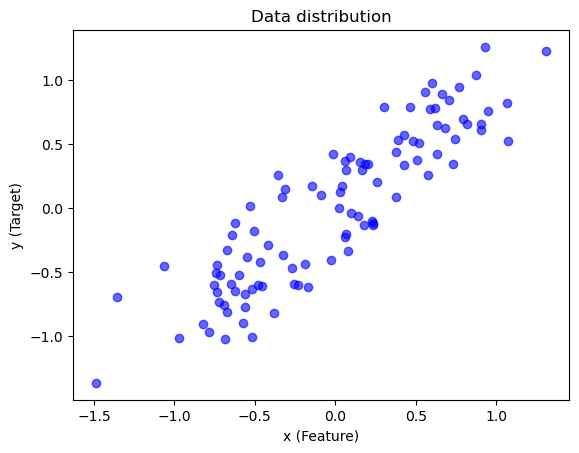

In [492]:
x, y = make_regression_data(probes=100, features=1, noise=0.2)

plt.scatter(x, y, c='b', alpha=0.6)
plt.title('Data distribution')
plt.xlabel('x (Feature)')
plt.ylabel('y (Target)')
plt.show()

In [494]:
lr = LinearRegression(max_iter=10, eta=1, use_bias=False, verbose=True)
lr.fit(x, y)

Iter: 0, weights: [-0.90854729], error: 1.4668816573795445
Iter: 1, weights: [-0.25927299], error: 0.624329553385341
Iter: 2, weights: [0.15668693], error: 0.2785149503806867
Iter: 3, weights: [0.42317316], error: 0.13657982365754523
Iter: 4, weights: [0.59389853], error: 0.07832438845360422
Iter: 5, weights: [0.70327435], error: 0.05441419927668321
Iter: 6, weights: [0.77334637], error: 0.044600571681682855
Iter: 7, weights: [0.81823826], error: 0.04057269528719945
Iter: 8, weights: [0.84699841], error: 0.03891950556788487
Iter: 9, weights: [0.86542371], error: 0.0382409752505716


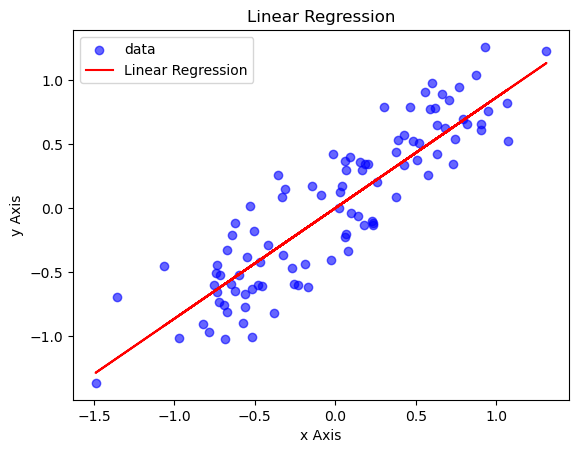

In [496]:
y_pred = lr.predict(x)

plt.scatter(x, y, c='b', alpha=0.6, label='data')
plt.plot(x, y_pred, c='r', label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('x Axis')
plt.ylabel('y Axis')
plt.legend(loc='best')
plt.show()

### 3D Example

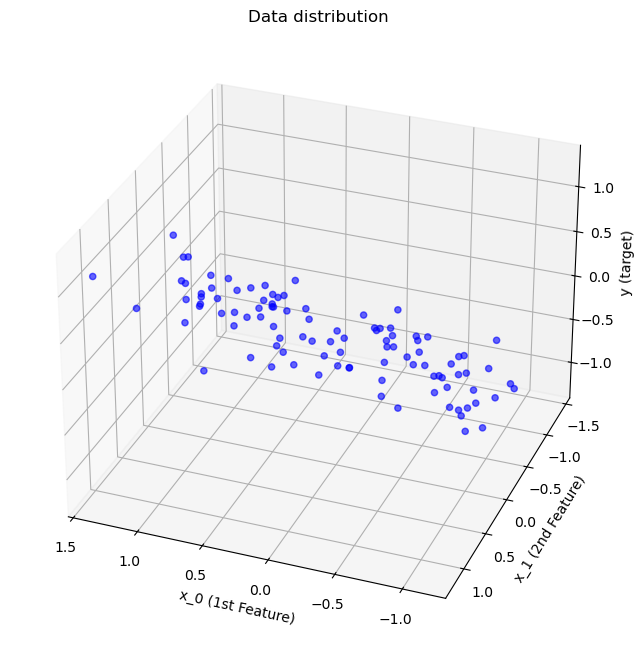

In [498]:
x, y = make_regression_data(probes=100, features=2, noise=0.2)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')


ax.scatter(x[:, 0], x[:, 1], y, color='b', alpha=0.6)

plt.title('Data distribution')
ax.set_xlabel('x_0 (1st Feature)')
ax.set_ylabel('x_1 (2nd Feature)')
ax.set_zlabel('y (target)')


ax.view_init(azim=111) 
plt.show()

In [500]:
lr = LinearRegression(max_iter=10, eta=1, use_bias=False, verbose=True)
lr.fit(x, y)

Iter: 0, weights: [ 0.30578729 -0.00278034], error: 0.6033258605111683
Iter: 1, weights: [0.52518452 0.21875504], error: 0.10820451042093861
Iter: 2, weights: [0.60252398 0.30297171], error: 0.041785458379533055
Iter: 3, weights: [0.62800104 0.33675523], error: 0.032840779526179274
Iter: 4, weights: [0.63463194 0.35192534], error: 0.03160485848155742
Iter: 5, weights: [0.63449796 0.36013983], error: 0.031405944754135745
Iter: 6, weights: [0.63201571 0.3656741 ], error: 0.03134930000133112
Iter: 7, weights: [0.6287958  0.37010021], error: 0.031314661236145874
Iter: 8, weights: [0.62542181 0.37400013], error: 0.03128561938119677
Iter: 9, weights: [0.62210158 0.37759298], error: 0.031259715660263976


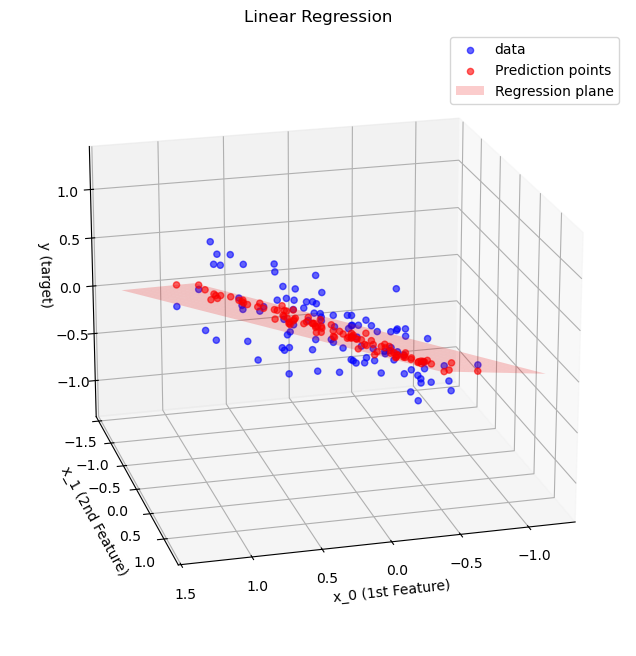

In [482]:
y_pred = lr.predict(x)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

x1, x2 = np.meshgrid(np.linspace(x[:, 0].min(), x[:, 0].max(), 10),
                     np.linspace(x[:, 1].min(), x[:, 1].max(), 10))
y_pred_grid = lr.predict(np.column_stack([x1.ravel(), x2.ravel()])).reshape(x1.shape) 

ax.scatter(x[:, 0], x[:, 1], y, color='b', alpha=0.6, label='data')
ax.scatter(x[:, 0], x[:, 1], y_pred, color='r', alpha=0.6, label='Prediction points')
ax.plot_surface(x1, x2, y_pred_grid, color='r', alpha=0.2, label='Regression plane')

plt.title('Linear Regression')
ax.set_xlabel('x_0 (1st Feature)')
ax.set_ylabel('x_1 (2nd Feature)')
ax.set_zlabel('y (target)')
ax.legend(loc='best')

ax.view_init(elev=20, azim=75) 
plt.show()


## Bias role

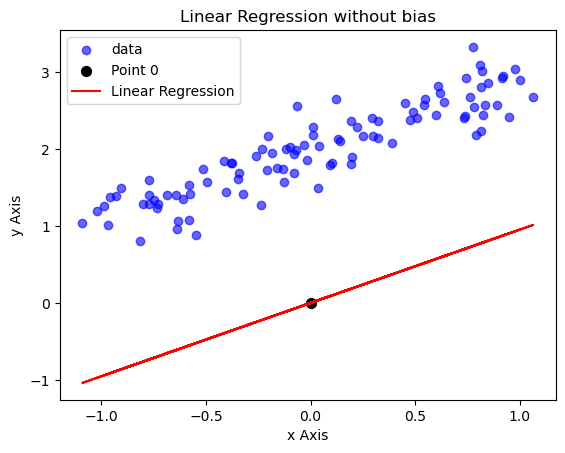

In [502]:
x, y = make_regression_data(probes=100, features=1, noise=0.2, offset=2)

lr = LinearRegression(max_iter=10, eta=1, use_bias=False)
lr.fit(x, y)

y_pred = lr.predict(x)

plt.scatter(x, y, c='b', alpha=0.6, label='data')
plt.scatter(0, 0, c='k', s=50, label='Point 0')
plt.plot(x, y_pred, c='r', label='Linear Regression')
plt.title('Linear Regression without bias')
plt.xlabel('x Axis')
plt.ylabel('y Axis')
plt.legend(loc='best')
plt.show()

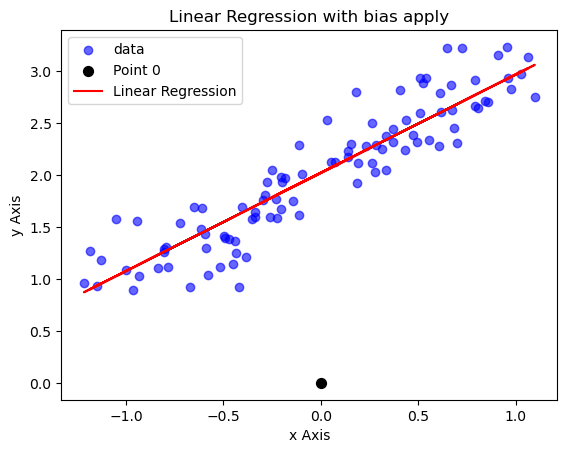

In [516]:
x, y = make_regression_data(probes=100, features=1, noise=0.2, offset=2)

lr = LinearRegression(max_iter=10, eta=1, use_bias=True)
lr.fit(x, y)

y_pred = lr.predict(x)

plt.scatter(x, y, c='b', alpha=0.6, label='data')
plt.scatter(0, 0, c='k', s=50, label='Point 0')
plt.plot(x, y_pred, c='r', label='Linear Regression')
plt.title('Linear Regression with bias apply')
plt.xlabel('x Axis')
plt.ylabel('y Axis')
plt.legend(loc='best')
plt.show()

## Visualise linear regression cost

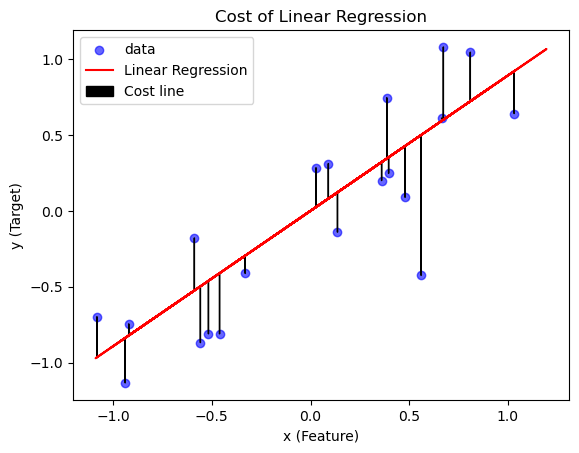

In [524]:
x, y = make_regression_data(probes=100, features=1, noise=0.2)

lr = LinearRegression(max_iter=10, eta=1, use_bias=False)
lr.fit(x, y)
y_pred = lr.predict(x)

idx = np.random.choice(x.shape[0], 20, False)

plt.scatter(x[idx], y[idx], c='b', alpha=0.6, label = 'data')
plt.plot(x, y_pred, c='r', label='Linear Regression')

for n, i in enumerate(idx):
    plt.arrow(x[i][0], y[i], 0, - (y[i] - lr.predict(x[i])),
              color='k',
              label='Cost line' if n==0 else None)

plt.title('Cost of Linear Regression')
plt.xlabel('x (Feature)')
plt.ylabel('y (Target)')
plt.legend(loc='best')

plt.show()


### Visualise Gradient

#### Stable

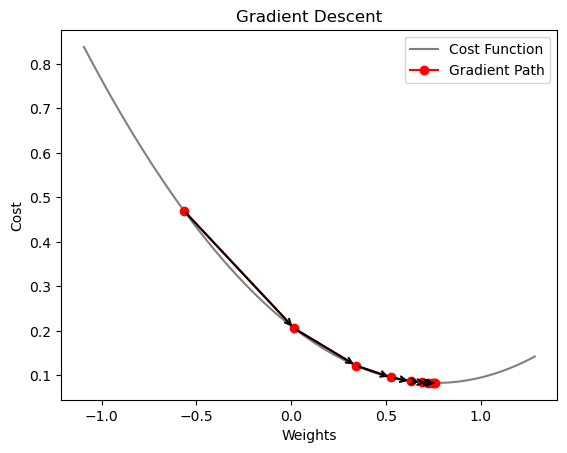

In [554]:
# 2 dimmencial gradient (one feature without bias)
x, y = make_regression_data(probes=100, features=1, noise=0.3)

lr = LinearRegression(max_iter=10, eta=1, use_bias=False)
lr.fit(x, y)

lr.plot_gradient(x, 0.4)

Iter: 0, weights: [-2.8356482  -0.43288471], error: 7.004345572619793
Iter: 1, weights: [-1.79577014 -0.08823848], error: 2.578209326491023
Iter: 2, weights: [-1.04427124 -0.01782258], error: 1.3245448269879936
Iter: 3, weights: [-0.50143356 -0.00266502], error: 0.7128459250362692
Iter: 4, weights: [-0.10937126  0.00114256], error: 0.39547942319716695
Iter: 5, weights: [0.17378393 0.00246459], error: 0.23001264040772137
Iter: 6, weights: [0.37828219 0.0031338 ], error: 0.14370999167742188
Iter: 7, weights: [0.52597302 0.00356001], error: 0.09869574640191381
Iter: 8, weights: [0.63263684 0.00385639], error: 0.07521689845802547
Iter: 9, weights: [0.70967051 0.00406816], error: 0.06297063305803531


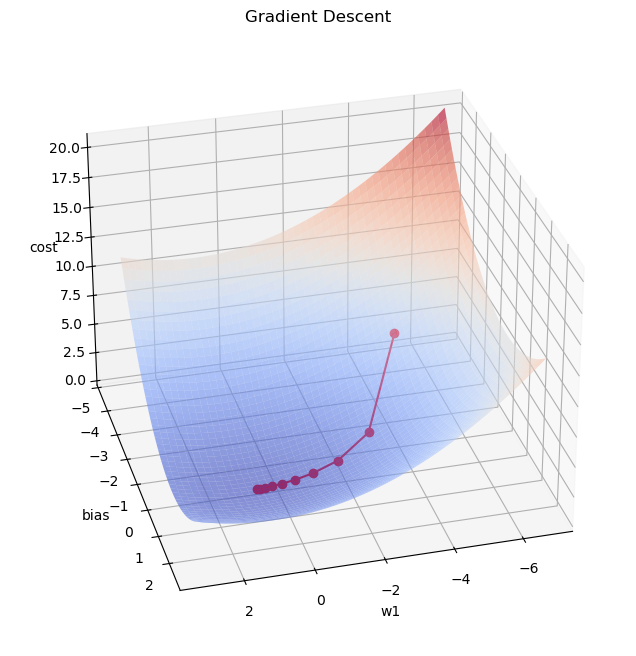

In [528]:
# 3 dimmencial grdient (1 feature with bias)

lr = LinearRegression(max_iter=10, eta=0.8, use_bias=True, verbose=True)
lr.fit(x, y)
lr.plot_gradient(x, 0.5)

### Unstable

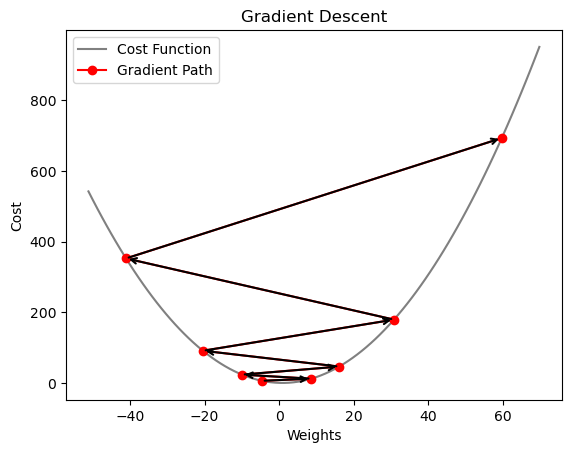

In [226]:
# 2 dimmencial gradient (one feature without bias)

lr = LinearRegression(max_iter=8, eta=6, use_bias=False)
lr.fit(x, y)

lr.plot_gradient(x, 0.1)

Iter: 0, weights: [1.30060743 1.22919213], error: 7.273176710107103
Iter: 1, weights: [ 0.69626208 -1.92917084], error: 0.9433089192810137
Iter: 2, weights: [0.80092949 2.8175974 ], error: 1.886265392431551
Iter: 3, weights: [ 0.71870322 -4.30415244], error: 4.140493070514188
Iter: 4, weights: [0.83508091 6.3797273 ], error: 9.21477430768875
Iter: 5, weights: [ 0.66114564 -9.64786852], error: 20.63443798729081
Iter: 6, weights: [ 0.92201668 14.39617989], error: 46.33435463899084
Iter: 7, weights: [  0.53067259 -21.67387426], error: 104.17193481734525
Iter: 8, weights: [ 1.117753   32.43717984], error: 234.33522391201026
Iter: 9, weights: [  0.23703521 -48.73836161], error: 527.2672894599583


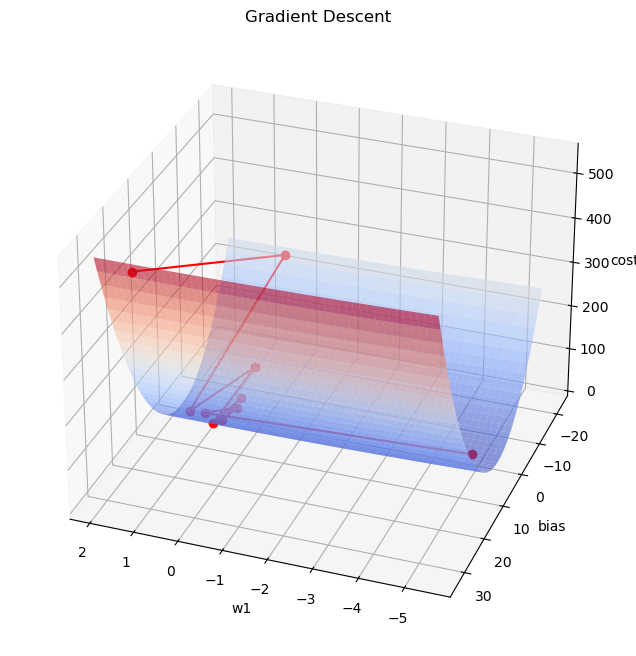

In [564]:
# 3 dimmencial grdient (1 feature with bias)

lr = LinearRegression(max_iter=10, eta=2.5, use_bias=True, verbose=True)
lr.fit(x, y)
lr.plot_gradient(x, 0.1)